# Técnica de agrupamiento (Clustering) Jearárquico | IrisPlant
## Enlace Simple
## Enlace Completo
## MAXMIN

En este documento se presentan las técnicas de agrupamiento no supervisado, tambien conocido como "clustering". A continuación se propone el uso de la base de datos Iris Plant.

In [1]:
#sección de importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbs
#librerias especializadas
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import pdist,squareform
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import linkage,dendrogram
#estandarizar conjunto de datos
from sklearn.preprocessing import StandardScaler

In [2]:
sc = StandardScaler()
iris = pd.read_csv('../datasets/iris_plant/iris_plant.csv')
data = iris.columns.values.tolist()[:-1] #tomamos todos los nombres de las columnas, menos la última
target = iris.columns.values.tolist()[-1]#tomamos el nombre de la ultima columna
X,y = iris[data],iris[target] #separacion del dataset en caracteristicas y clase
X_std = pd.DataFrame(sc.fit_transform(X),columns=data) #caracteristicas estandarizadas
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=.20,random_state=0) #partición 80-20 retorna DataFrames
X_train_std,X_test_std,y_train_std,y_test_std= train_test_split(X_std,y,test_size=.20,random_state=0) #partición 80-20

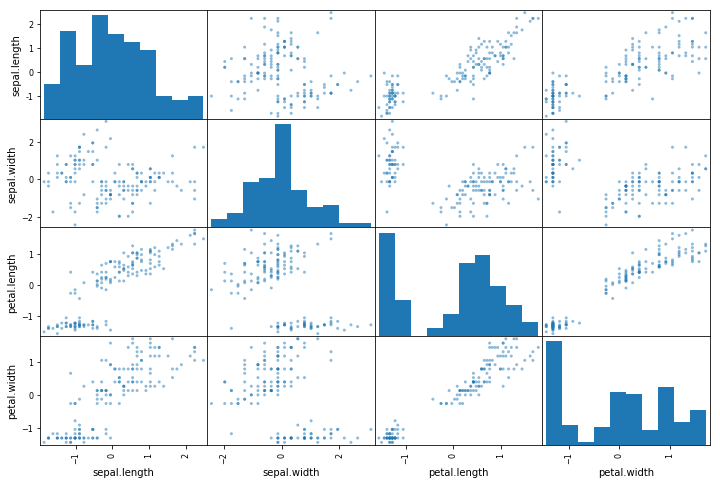

In [5]:
#Tabla que muestra la distribución de las caracteristicas estandarizadas
pd.plotting.scatter_matrix(X_std,figsize=(12,8))
plt.show()

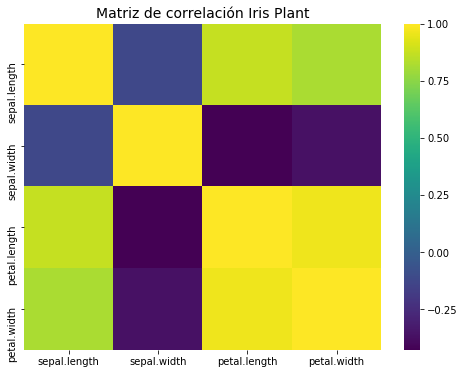

In [13]:
#Matriz de correlación datos STD de Iris Plant, Entre mas obscuro menor correlación
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(111)
ax.set_title('Matriz de correlación Iris Plant', fontdict={'fontsize': 14, 'fontweight': 'medium'})
sbs.heatmap(X_std.corr(),xticklabels=X_std.columns.values,yticklabels=X_std.columns.values,cmap='viridis')
plt.show()

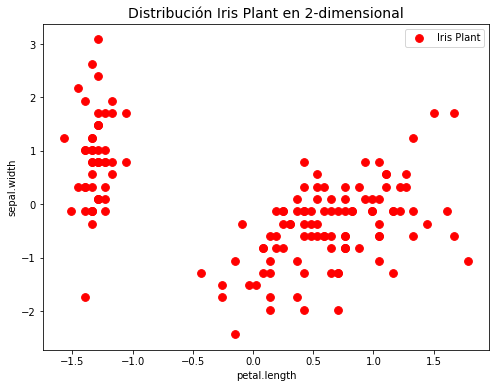

In [7]:
#mostrando distribución de los datos a partir de las caract. menos correlacionadas
fig = plt.figure()
fig.set_size_inches(8,6)
ax = fig.add_subplot(111)
ax.set_title('Distribución Iris Plant en 2-dimensional', fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.scatter(x=X_std['petal.length'],y=X_std['sepal.width'],c='red',s=60,marker='o')
plt.xlabel('petal.length')
plt.ylabel('sepal.width')
plt.legend(["Iris Plant"],loc='best')
plt.show()

# Método de enlace simple

In [8]:
#funcion para guardar las predicciones
def agg_to_csv(data,num_cluster,metrica,enlace,carpeta,nom_arch,ext):
    from sklearn.cluster import AgglomerativeClustering
    cluster = AgglomerativeClustering(n_clusters=num_cluster,affinity=metrica,linkage=enlace)
    c_predict= cluster.fit_predict(data)
    guardar = pd.DataFrame(data)
    guardar['cluster'] = pd.DataFrame(c_predict)
    guardar['cluster'] = guardar['cluster'].replace([0],3) #reemplazar el 0 por 3
    guardar.to_csv('../datasets/'+carpeta+'/'+str(nom_arch)+str(ext),index=False)

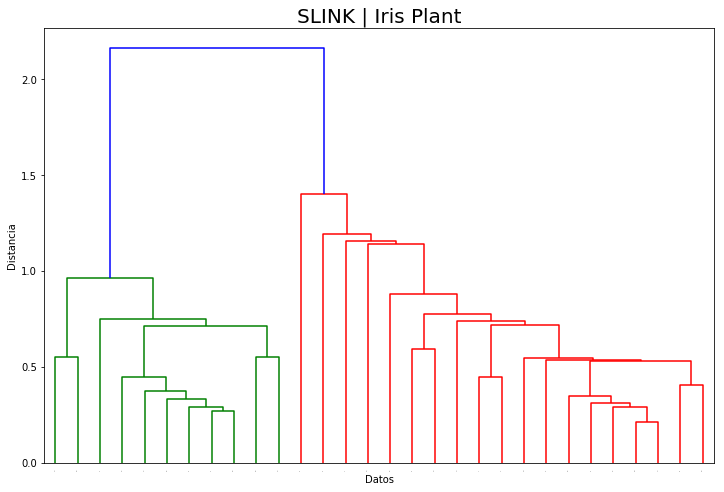

In [10]:
#configuracion del archivo
carpeta_iris = 'Cluster_Datasets'
#carpeta_CMC = 'Contraceptive Method Choice'
nombre_archivo = 'IP_SLINK_nuevo'
extension = '.csv'
#print('../datasets/'+carpeta_CMC+'/'+nombre+extension)
#--------------------------------------------------------------
#The distance function can be cityblock, euclidean, mahalanobis, minkowski...mas en función
#configuracion clustering
metrica = 'euclidean' #metrica de distancia
enlace = 'single'   #otros complete,ward,average
num_cluster = 3
den_title = 'SLINK | Iris Plant' #titulo para el dendograma
xlabel = 'Datos'
ylabel = 'Distancia'
#--------------------------------------------------------------
ma_distancia = pdist(X=X_test_std,metric=metrica) #matriz distancia
dist_ma_comp = pd.DataFrame(squareform(X=ma_distancia,force='no',checks=True)) #Matriz completa
#--------------------------------------------------------------
#Generando enlace simple
slink_std = linkage(X_test_std,method=enlace,metric=metrica)
#--------------------------------------------------------------
#mostrando dendograma formado
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title(den_title, fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.xlabel(xlabel)
plt.ylabel(ylabel)
dendrogram(slink_std,leaf_rotation=90.,leaf_font_size=0.8,truncate_mode='lastp',show_contracted=True,show_leaf_counts=True)
plt.show()
#--------------------------------------------------------------
#Generando nuevo DS prediccion cluster
agg_to_csv(data=X_std,num_cluster=num_cluster,
           metrica=metrica,enlace='ward',carpeta=carpeta_iris,nom_arch=nombre_archivo,ext=extension)

# Método enlace completo

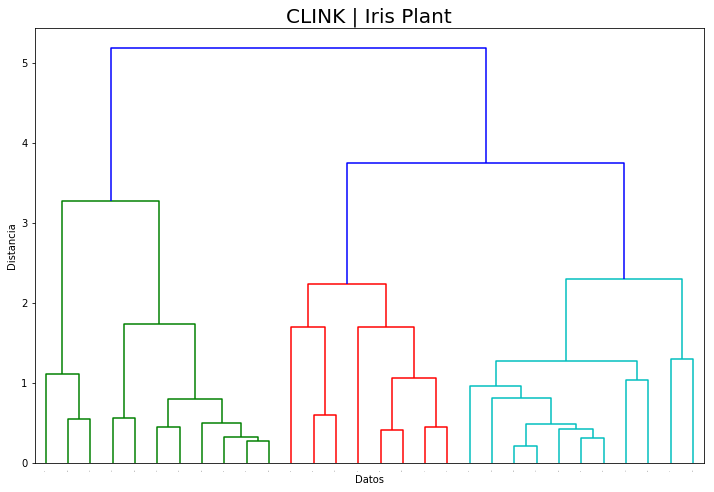

In [11]:
#configuracion del archivo
carpeta_iris = 'Cluster_Datasets'
#carpeta_CMC = 'Contraceptive Method Choice'
nombre_archivo = 'IP_CLINK_nuevo'
extension = '.csv'
#print('../datasets/'+carpeta_CMC+'/'+nombre+extension)
#--------------------------------------------------------------
#The distance function can be cityblock, euclidean, mahalanobis, minkowski...mas en función
#configuracion clustering
metrica = 'euclidean' #metrica de distancia
enlace = 'complete'   #otros complete,ward,average
num_cluster = 3
den_title = 'CLINK | Iris Plant' #titulo para el dendograma
xlabel = 'Datos'
ylabel = 'Distancia'
#--------------------------------------------------------------
ma_distancia = pdist(X=X_test_std,metric=metrica) #matriz distancia
dist_ma_comp = pd.DataFrame(squareform(X=ma_distancia,force='no',checks=True)) #Matriz completa
#--------------------------------------------------------------
#Generando enlace simple
slink_std = linkage(X_test_std,method=enlace,metric=metrica)
#--------------------------------------------------------------
#mostrando dendograma formado
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title(den_title, fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.xlabel(xlabel)
plt.ylabel(ylabel)
dendrogram(slink_std,leaf_rotation=90.,leaf_font_size=0.8,truncate_mode='lastp',show_contracted=True,show_leaf_counts=True)
plt.show()
#--------------------------------------------------------------
#Generando nuevo DS prediccion cluster
agg_to_csv(data=X_std,num_cluster=num_cluster,
           metrica=metrica,enlace='complete',carpeta=carpeta_iris,nom_arch=nombre_archivo,ext=extension)

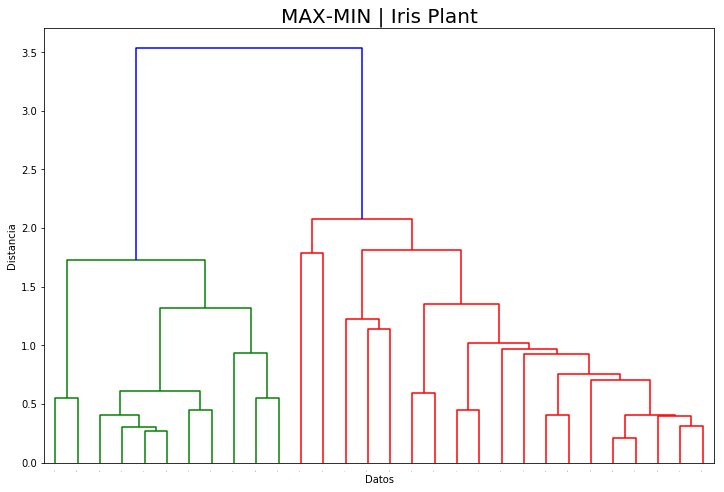

In [12]:
#configuracion del archivo
carpeta_iris = 'Cluster_Datasets'
#carpeta_CMC = 'Contraceptive Method Choice'
nombre_archivo = 'IP_MAXMIN_nuevo'
extension = '.csv'
#print('../datasets/'+carpeta_CMC+'/'+nombre+extension)
#--------------------------------------------------------------
#The distance function can be cityblock, euclidean, mahalanobis, minkowski...mas en función
#configuracion clustering
metrica = 'euclidean' #metrica de distancia
enlace = 'average'   #otros complete,ward,average
num_cluster = 3
den_title = 'MAX-MIN | Iris Plant' #titulo para el dendograma
xlabel = 'Datos'
ylabel = 'Distancia'
#--------------------------------------------------------------
ma_distancia = pdist(X=X_test_std,metric=metrica) #matriz distancia
dist_ma_comp = pd.DataFrame(squareform(X=ma_distancia,force='no',checks=True)) #Matriz completa
#--------------------------------------------------------------
#Generando enlace simple
slink_std = linkage(X_test_std,method=enlace,metric=metrica)
#--------------------------------------------------------------
#mostrando dendograma formado
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.set_title(den_title, fontdict={'fontsize': 20, 'fontweight': 'medium'})
plt.xlabel(xlabel)
plt.ylabel(ylabel)
dendrogram(slink_std,leaf_rotation=90.,leaf_font_size=0.8,truncate_mode='lastp',show_contracted=True,show_leaf_counts=True)
plt.show()
#--------------------------------------------------------------
#Generando nuevo DS prediccion cluster
agg_to_csv(data=X_std,num_cluster=num_cluster,
           metrica=metrica,enlace='average',carpeta=carpeta_iris,nom_arch=nombre_archivo,ext=extension)